In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Question 1 : What is the difference between AI, ML, DL, and Data Science? Provide a
brief explanation of each.

1. AI is the broad field focused on creating machines that can simulate human intelligence.
2. Machine Learning is a subset of AI that enables machines to learn from data without being explicitly 3.programmed.
4. Deep Learning is a subset of Machine Learning that uses neural networks with many layers to learn 5.5.complex patterns.
5. Data Science is an interdisciplinary field focused on extracting insights and knowledge from data.

# q2 Overfitting and Underfitting in Machine Learning

Underfitting occurs when a machine learning model is too simple to capture the underlying patterns in the data.

### Characteristics
- Poor performance on training data  
- Poor performance on test/validation data  
- High bias, low variance  



## Overfitting
Overfitting occurs when a model learns noise and details in the training data instead of the true underlying pattern.

### Characteristics
- Very high training accuracy  
- Poor test/validation accuracy  
- High variance, low bias  





### Question 3:How would you handle missing values in a dataset? Explain at least three
methods with examples

##### Deletion Method
This method involves removing rows or columns that contain missing values.

###### Types
- **Row-wise deletion**: Remove records with missing values  
- **Column-wise deletion**: Remove features with a large number of missing values  

###### Example
```python
# Remove rows with missing values
df_cleaned = df.dropna()

# second method
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['Department'].fillna(df['Department'].mode()[0], inplace=True)

3. Predictive Modeling Imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_imputed = imputer.fit_transform(df)


### Q4 Imbalanced Dataset and Techniques to Handle It

#### What is an Imbalanced Dataset?
An **imbalanced dataset** is a dataset in which the classes are not represented equally. One class (majority class) has significantly more samples than the other (minority class).

### Example
In an employee attrition dataset:
- Attrition = No → 85%
- Attrition = Yes → 15%

This imbalance can cause machine learning models to become **biased toward the majority class**, leading to misleading accuracy.

---

## Problems Caused by Imbalanced Data
- Model predicts the majority class most of the time
- High accuracy but poor minority-class detection
- Low recall and F1-score for minority class

---

#### Technique 1: Random Under/Oversampling

#####  Random Oversampling
Duplicates samples from the minority class to balance the dataset.

##### Theory
- Increases minority class representation
- Simple and fast

#### Practical Example
```python
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


Technique 2: SMOTE (Synthetic Minority Oversampling Technique)
Theory

SMOTE generates new synthetic samples for the minority class instead of duplicating existing ones.
It creates new points by interpolating between minority-class neighbors.

Practical Example
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

Technique 3: Class Weights (Algorithm-Level Solution)
Theory

Class weights penalize misclassification of the minority class more heavily during training, without modifying the dataset.

Practical Example
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


#### Q5 Feature Scaling in Machine Learning

#### Why Feature Scaling Is Important
Feature scaling is the process of transforming features so that they are on a similar scale. Many machine learning algorithms are sensitive to the magnitude of feature values.

##### Importance of Feature Scaling
- Prevents features with larger values from dominating the model
- Improves performance of distance-based algorithms
- Speeds up convergence of gradient descent
- Ensures fair contribution of all features

### Algorithms That Require Scaling
- K-Nearest Neighbors (KNN)
- Support Vector Machines (SVM)
- K-Means Clustering
- Linear & Logistic Regression (with gradient descent)
- Neural Networks

---

## Impact on Distance-Based Algorithms
Distance-based algorithms calculate distances between data points.
If features are on different scales:
- Large-scale features dominate distance calculations
- Model becomes biased

**Example**:
- Age (0–60)
- MonthlyIncome (1,000–100,000)

Without scaling, income will dominate distance calculations.

---

## Impact on Gradient Descent
- Large feature values lead to slow or unstable convergence
- Scaling creates smoother cost function contours
- Results in faster and more stable training

---

## Min-Max Scaling

#### Definition
Min-Max scaling transforms features to a fixed range, usually [0, 1].

#### Formula
X_scaled = (X − X_min) / (X_max − X_min)


#### Example
python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


### Standardization (Z-score Scaling)
Definition

Standardization rescales data to have:

Mean = 0

Standard deviation = 1

Formula
X_scaled = (X − μ) / σ

Example
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Q6  Label Encoding vs One-Hot Encoding

Categorical variables must be converted into numerical form before being used in most machine learning algorithms. Two common techniques are **Label Encoding** and **One-Hot Encoding**. Each is suitable for different types of categorical data.

---

### Label Encoding

### Definition
Label Encoding assigns a unique integer value to each category.

### Example
Categories: `Low, Medium, High`

Encoding:
- Low → 0  
- Medium → 1  
- High → 2  

### Practical Example
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['EducationLevel_encoded'] = le.fit_transform(df['EducationLevel'])

When to Use Label Encoding

When the categorical variable has an ordinal relationship

Order of categories is meaningful

One-Hot Encoding
Definition

One-Hot Encoding creates a separate binary column for each category.

Example

Categories: Red, Blue, Green

Encoding:

Red → [1, 0, 0]

Blue → [0, 1, 0]

Green → [0, 0, 1]

Practical Example
df_encoded = pd.get_dummies(df, columns=['Color'])

When to Use One-Hot Encoding

When the categorical variable is nominal

No inherent order among categories

In [ ]:
# question 7:
df = pd.read_csv('googleplaystore.csv')

In [18]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [19]:
df['Rating'].isna().sum()

1474

In [20]:
df.Category.isna().sum()

0

In [21]:
df.dropna(subset=['Rating'], inplace=True)

In [22]:
df.shape

(9367, 13)

In [25]:
df.dropna(inplace=True)

In [26]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [27]:
df['Rating'] = pd.to_numeric(df['Rating'])

In [32]:
category_avg_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

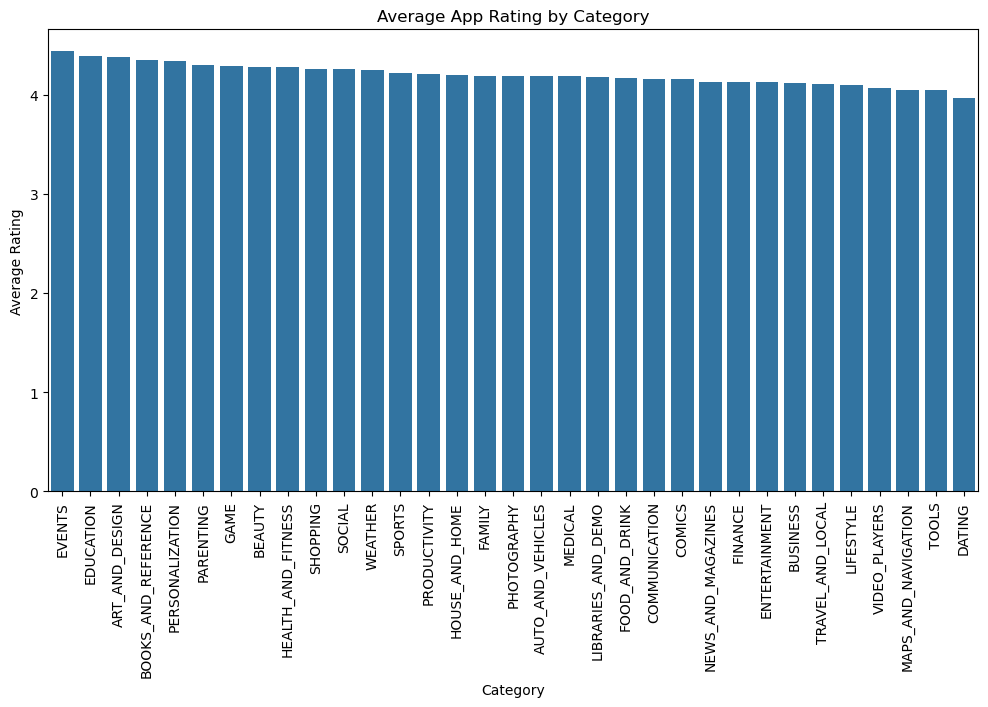

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(
    x=category_avg_rating.index,
    y=category_avg_rating.values
)
plt.xticks(rotation=90)
plt.title("Average App Rating by Category")
plt.ylabel("Average Rating")
plt.xlabel("Category")
plt.show()

Analysis & Interpretation
Categories with Highest Average Ratings

Events

Education

Books & Reference

Health & Fitness

Possible Reasons

Clear purpose and utility

Lower competition

Users have well-defined expectations

Less dependency on ads or aggressive monetization

Categories with Lowest Average Ratings

Games

Social

Dating

Tools

Possible Reasons

Extremely high competition

Diverse user expectations

Issues such as ads, in-app purchases, and bugs

User experience varies significantly across devices

In [36]:
# Q8

df = pd.read_csv('titanic.csv')
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


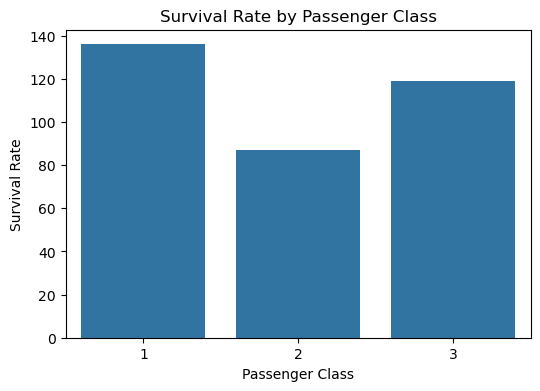

In [56]:
# which class has highest survival rate
survival_by_class = df.groupby('Pclass')['Survived'].sum().reset_index()


plt.figure(figsize=(6,4))
sns.barplot(data=survival_by_class, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


In [50]:
pd.crosstab(df['Pclass'],df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [51]:
survival_by_class

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [53]:
summary = (
    df.groupby('Pclass')['Survived']
      .agg(
          Total_Passengers='count',
          Survived='sum',
          Survival_Rate=lambda x: round(x.mean() * 100, 2)
      )
)

summary


,Total_Passengers,Survived,Survival_Rate
Pclass,,,
1,216,136,62.96
2,184,87,47.28
3,491,119,24.24


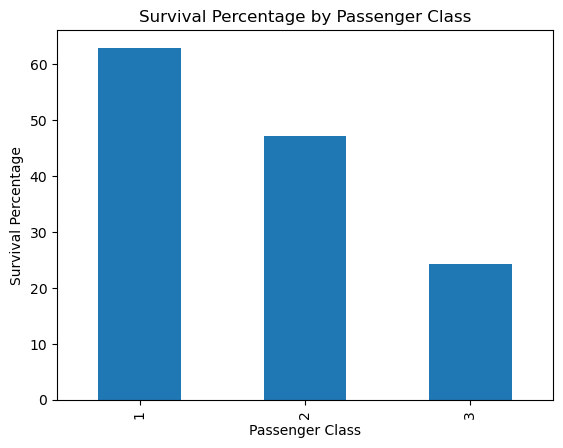

In [54]:

summary['Survival_Rate'].plot(kind='bar')
plt.title('Survival Percentage by Passenger Class')
plt.ylabel('Survival Percentage')
plt.xlabel('Passenger Class')
plt.show()

In [ ]:
# Although 3rd class had the highest number of passengers, it had the lowest survival rate, while 1st class had the highest survival percentage due to socio-economic advantages.

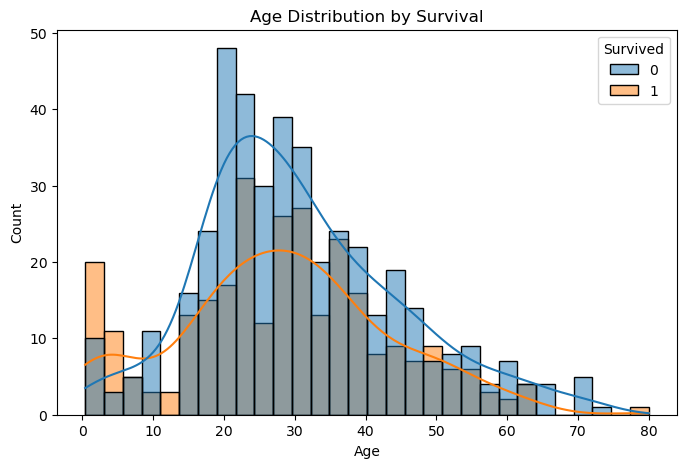

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


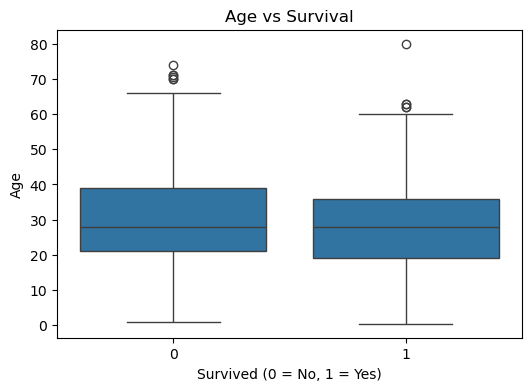

In [60]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


In [63]:
# sns.countplot(x = 'Sex', hue='Survived',data = df)
# female survived more

In [64]:
df['age_group'] = df['Age'].apply(lambda x:'Child < 18' if x < 18 else 'Adult >18')

In [66]:
df['age_group'].value_counts()

age_group
Adult >18     778
Child < 18    113
Name: count, dtype: int64

In [67]:
df_lessThan18 = df.groupby('age_group')['Survived'].agg(
          Total_Passengers='count',
          Survived='sum',
          Survival_Rate=lambda x: round(x.mean() * 100, 2)
)

In [68]:
df_lessThan18

,Total_Passengers,Survived,Survival_Rate
age_group,,,
Adult >18,778,281,36.12
Child < 18,113,61,53.98


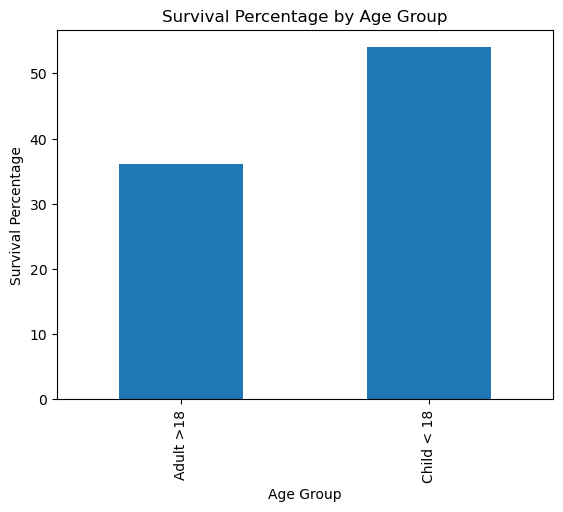

In [77]:
df_lessThan18['Survival_Rate'].plot(kind='bar')
plt.title('Survival Percentage by Age Group')
plt.ylabel('Survival Percentage')
plt.xlabel('Age Group')
plt.show()

In [71]:
age_survival_ct = pd.crosstab(df['age_group'], df['Survived'])
age_survival_ct


Survived,0,1
age_group,,
Adult >18,497,281
Child < 18,52,61


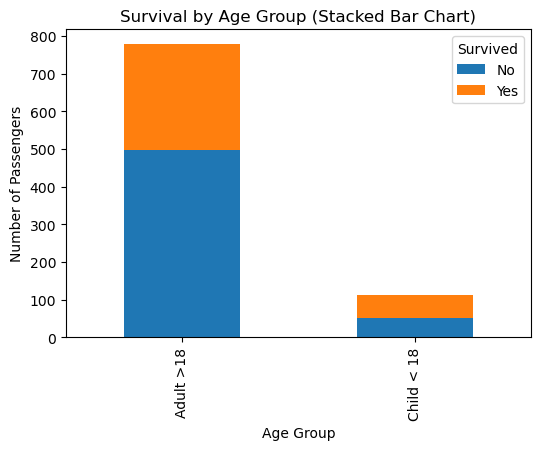

In [72]:
age_survival_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(6,4)
)

plt.title("Survival by Age Group (Stacked Bar Chart)")
plt.xlabel("Age Group")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


In [84]:
df = pd.read_csv('flight_price.csv')

In [87]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [86]:
df.isna().sum()
# df.dropna(inplace=True)
df.drop(columns=['Unnamed: 0'],axis=0,inplace=True)

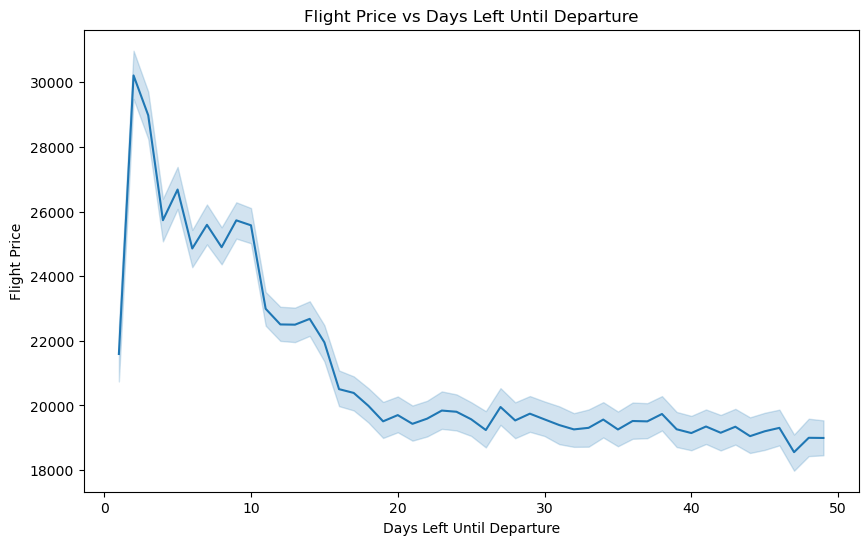

In [88]:
plt.figure(figsize=(10,6))
sns.lineplot(data = df, x = 'days_left',y = 'price')
plt.title("Flight Price vs Days Left Until Departure")
plt.xlabel("Days Left Until Departure")
plt.ylabel("Flight Price")
plt.show()

In [ ]:
# Flight prices increase exponentially as departure approaches. The best time to book is 30–50 days in advance to avoid last-minute price surges.

In [89]:
route_df = df[
    (df['source_city'] == 'Delhi') &
    (df['destination_city'] == 'Mumbai')
]


In [90]:
route_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
211968,Air_India,AI-401,Delhi,Early_Morning,one,Night,Mumbai,Business,13.67,49,59033
211969,Air_India,AI-762,Delhi,Night,one,Night,Mumbai,Business,24.25,49,59033
211970,Vistara,UK-747,Delhi,Early_Morning,one,Afternoon,Mumbai,Business,6.75,49,59929
211971,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,14.08,49,59929


In [92]:
airline_price = df.groupby('airline')['price'].mean().sort_values().reset_index()

In [93]:
airline_price

,airline,price
0,AirAsia,4091.072742
1,Indigo,5324.216303
2,GO_FIRST,5652.007595
3,SpiceJet,6179.278881
4,Air_India,23507.019112
5,Vistara,30396.536302


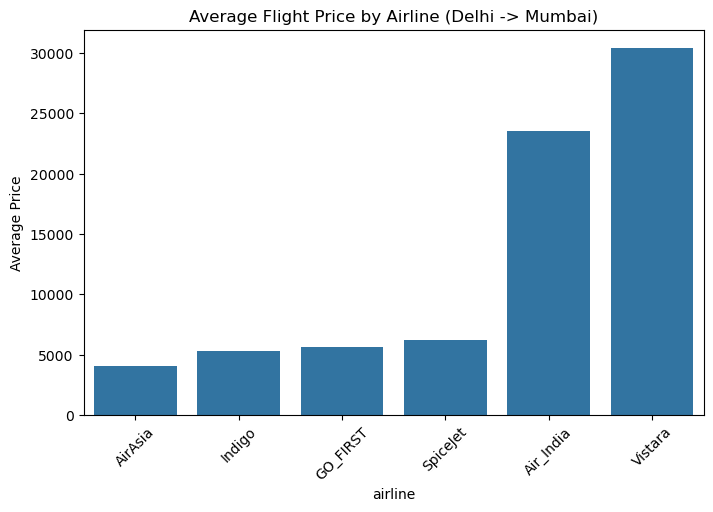

In [95]:
plt.figure(figsize=(8,5))
sns.barplot(data=airline_price, x='airline', y='price')
plt.title("Average Flight Price by Airline (Delhi -> Mumbai)")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()


In [96]:
# cheap : AirAsia, Indigo
# luxury: Air India, Vistara

In [97]:
df = pd.read_csv("hr_analytics.csv")

In [98]:
df.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [110]:
df.time_spend_company.value_counts()

time_spend_company
3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: count, dtype: int64

In [99]:
df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

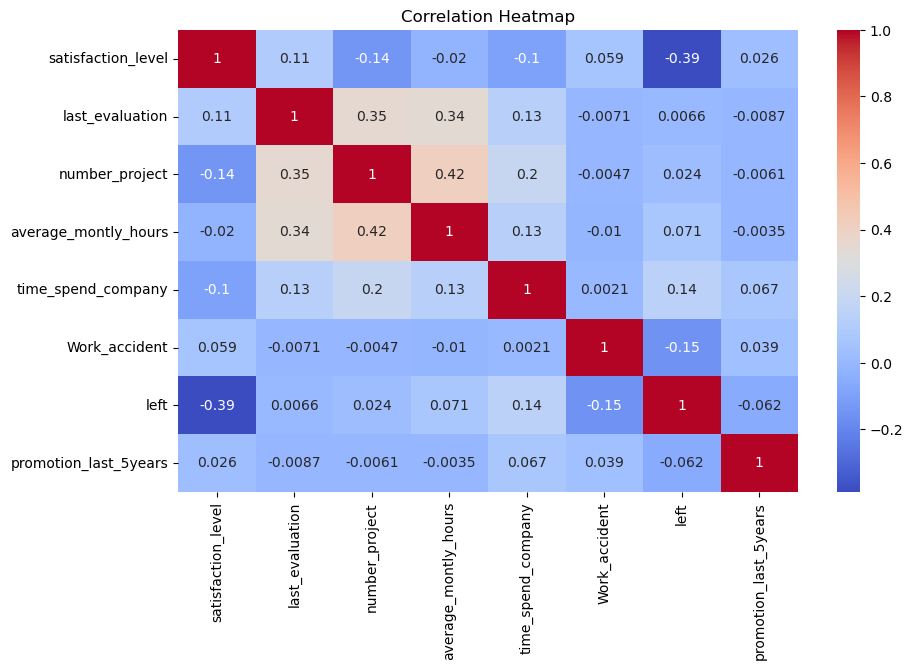

In [104]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


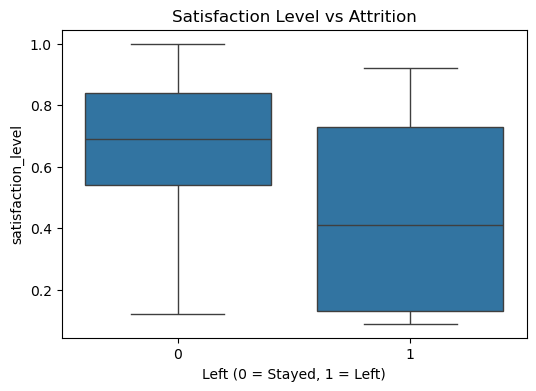

In [105]:
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='satisfaction_level', data=df)
plt.title("Satisfaction Level vs Attrition")
plt.xlabel("Left (0 = Stayed, 1 = Left)")
plt.show()


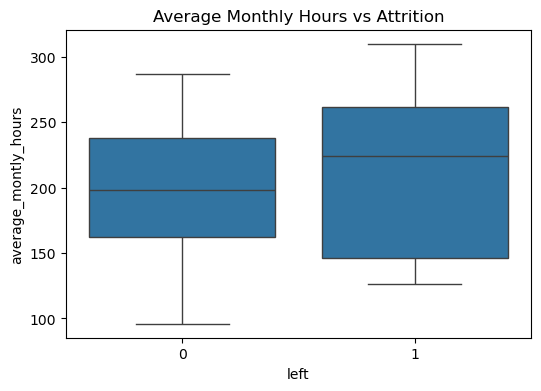

In [106]:
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='average_montly_hours', data=df)
plt.title("Average Monthly Hours vs Attrition")
plt.show()


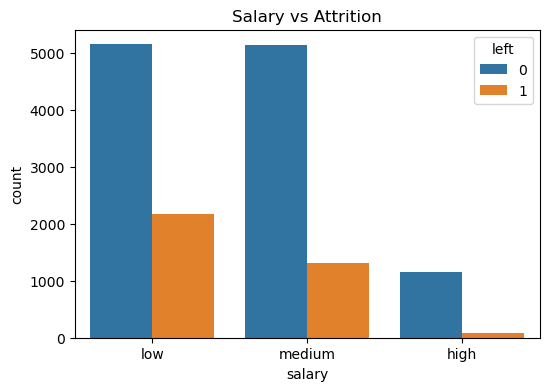

In [107]:
plt.figure(figsize=(6,4))
sns.countplot(x='salary', hue='left', data=df)
plt.title("Salary vs Attrition")
plt.show()


In [108]:
project_attrition = (
    df.groupby('number_project')['left']
      .mean()
      .reset_index()
)

project_attrition


,number_project,left
0,2,0.656198
1,3,0.017756
2,4,0.093700
3,5,0.221659
4,6,0.557922
5,7,1.000000


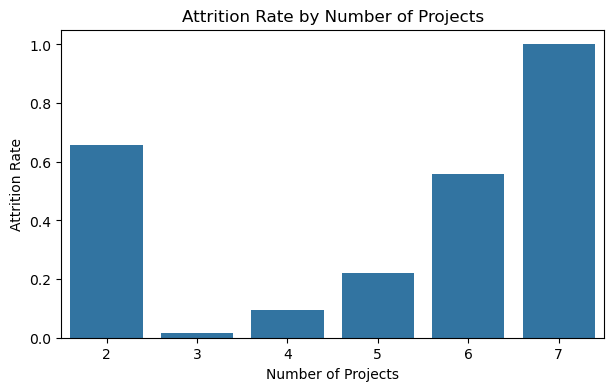

In [109]:
plt.figure(figsize=(7,4))
sns.barplot(
    x='number_project',
    y='left',
    data=project_attrition
)
plt.title("Attrition Rate by Number of Projects")
plt.ylabel("Attrition Rate")
plt.xlabel("Number of Projects")
plt.show()


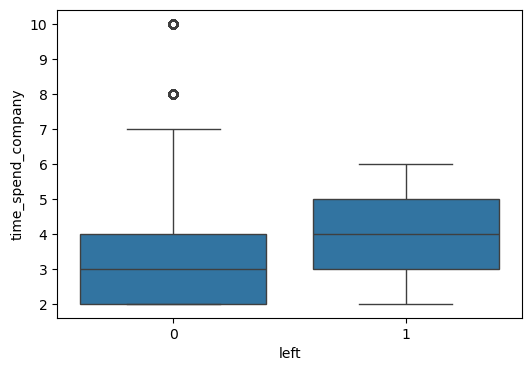

In [114]:
plt.figure(figsize=(6,4))
sns.boxplot(x='left', y='time_spend_company', data=df)
plt.show()

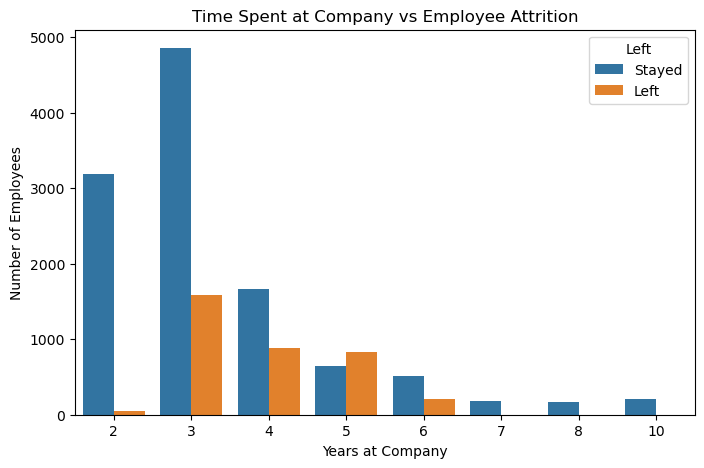

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='time_spend_company', hue='left', data=df)
plt.title('Time Spent at Company vs Employee Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.legend(title='Left', labels=['Stayed', 'Left'])
plt.show()
